# Personality Insights
Preforming sentiment analysis on Myers-Briggs personality type forum posts

In [114]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Retrieving Data

In [115]:
def get_data(filename):
    return pd.read_csv(filename)

get_data('mbti_1.csv').head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### Using TextBlob

In [120]:
def get_sentiment(df):
    sentiment = pd.DataFrame([TextBlob(df.posts[x]).sentiment for x in range(df.shape[0])])
    df = pd.concat([df, sentiment], axis=1)
    return df

In [121]:
%%time
df = get_sentiment(get_data('mbti_1.csv'))
print(df.shape)
df.head()

(8675, 4)
CPU times: user 1min 17s, sys: 687 ms, total: 1min 18s
Wall time: 1min 19s


### Analysis

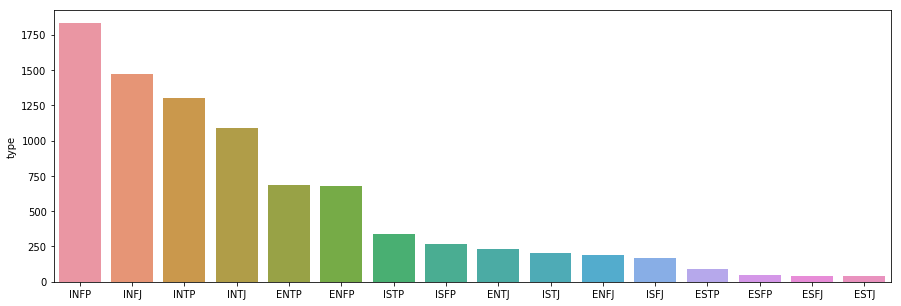

In [122]:
figure = plt.figure(figsize=(15,5))
sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts())

Interestingly, most posts are from introverts. You'd think the extraverts would be the more talkative people. Well, they are, just not behind a screen. Another interesting fact is the overwhelming majority of posts come from the intuitive 'N' type. I suppose this makes sense since the sensing 's' characteristic pertains to physcial reality.

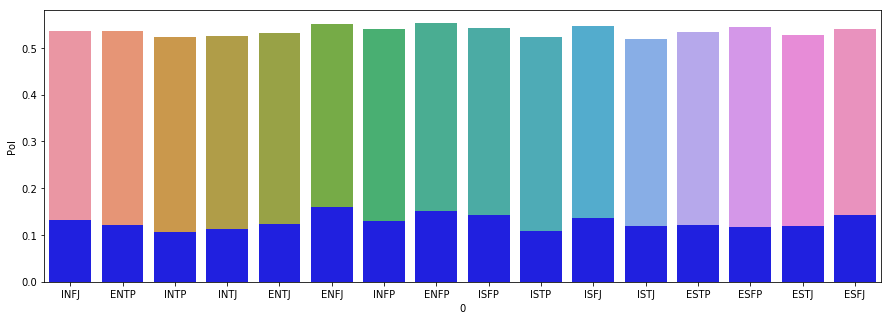

In [123]:
f, ax = plt.subplots(figsize=(15, 5))

pol = []
sub = []
types = []
for kind in df.type.unique():
    types.append(kind)
    pol.append({'Pol': df.set_index('type').loc[kind].polarity.mean()})
    sub.append({'Sub': df.set_index('type').loc[kind].subjectivity.mean()})


data = pd.concat([pd.DataFrame(types), pd.DataFrame(pol), pd.DataFrame(sub)], axis=1)
sns.barplot(x = data[0], y = data['Sub'])
sns.barplot(x = data[0], y = data['Pol'], color='blue')

It seems that people, generally, have the same sentiment. It would be interesting if this wasn't the case; for example, if one type had a far higher sentiment than the other, one could discriminate against the low-sentiment types. I'm glad thats not the case. In terms of subjectivity, I suppose you could argue an INTP is generally more objective than an ENFJ. Although this analysis could continue, and I dont doubt the myers briggs personalitty categorization gives insight to ones personality, I find it difficult to believe that 8 billion people can be categorized into 16 categories.